In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [15]:
DL_val = pd.read_csv('./resources/results/DL/validation.csv')
RF_val = pd.read_csv('./resources/results/ML/Mean_PCC_KW_24_RF/random_val_results_mk.csv')
AE_val = pd.read_csv('./resources/results/ML/Zscore_PCC_KW_29_AE/random_val_results_mk.csv')

fpr1, tpr1, _ = roc_curve(DL_val['Label'], DL_val['Score'])
fpr2, tpr2, _ = roc_curve(RF_val['Label'], RF_val['Score'])
fpr3, tpr3, _ = roc_curve(AE_val['Label'], AE_val['Score'])

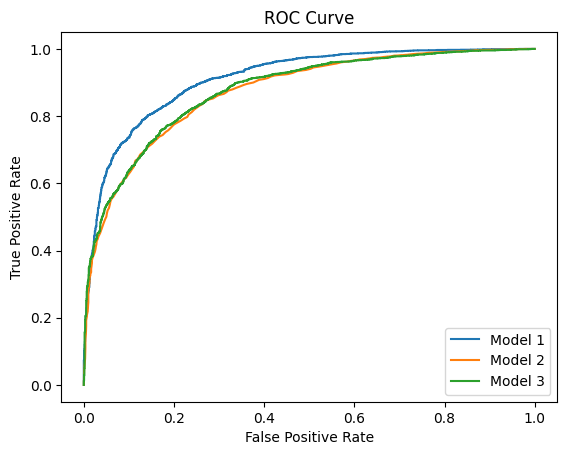

In [16]:
# 绘制主图
fig, ax = plt.subplots()
ax.plot(fpr1, tpr1, label=f'Model 1')
ax.plot(fpr2, tpr2, label=f'Model 2')
ax.plot(fpr3, tpr3, label=f'Model 3')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(loc="lower right")

In [17]:
# 添加局部放大的轴
axins = inset_axes(ax, width="30%", height="30%", loc=4)
axins.plot(fpr1, tpr1, label=f'Model 1')
axins.plot(fpr2, tpr2, label=f'Model 2')
axins.plot(fpr3, tpr3, label=f'Model 3')

In [18]:
# 设置放大区域的范围
x1, x2, y1, y2 = 0, 0.3, 0, 0.3
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

[Text(0, 0.0, ''),
 Text(0, 0.05, ''),
 Text(0, 0.1, ''),
 Text(0, 0.15000000000000002, ''),
 Text(0, 0.2, ''),
 Text(0, 0.25, ''),
 Text(0, 0.30000000000000004, '')]

In [19]:
# 在主图上标记放大区域的边界
mark_inset(ax, axins, loc1=1, loc2=4)
plt.show()